# Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn

In [2]:
raw_data = pd.read_csv('DataFolder/trainset.csv')
raw_data.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,poutcome,nr.employed,Subscribed
0,41,blue-collar,divorced,basic.4y,yes,no,telephone,may,mon,1575,1,999,nonexistent,5191.0,yes
1,49,entrepreneur,married,university.degree,yes,no,telephone,may,mon,1042,1,999,nonexistent,5191.0,yes
2,49,technician,married,basic.9y,no,no,telephone,may,mon,1467,1,999,nonexistent,5191.0,yes
3,41,technician,married,professional.course,yes,no,telephone,may,mon,579,1,999,nonexistent,5191.0,yes
4,45,blue-collar,married,basic.9y,yes,no,telephone,may,mon,461,1,999,nonexistent,5191.0,yes


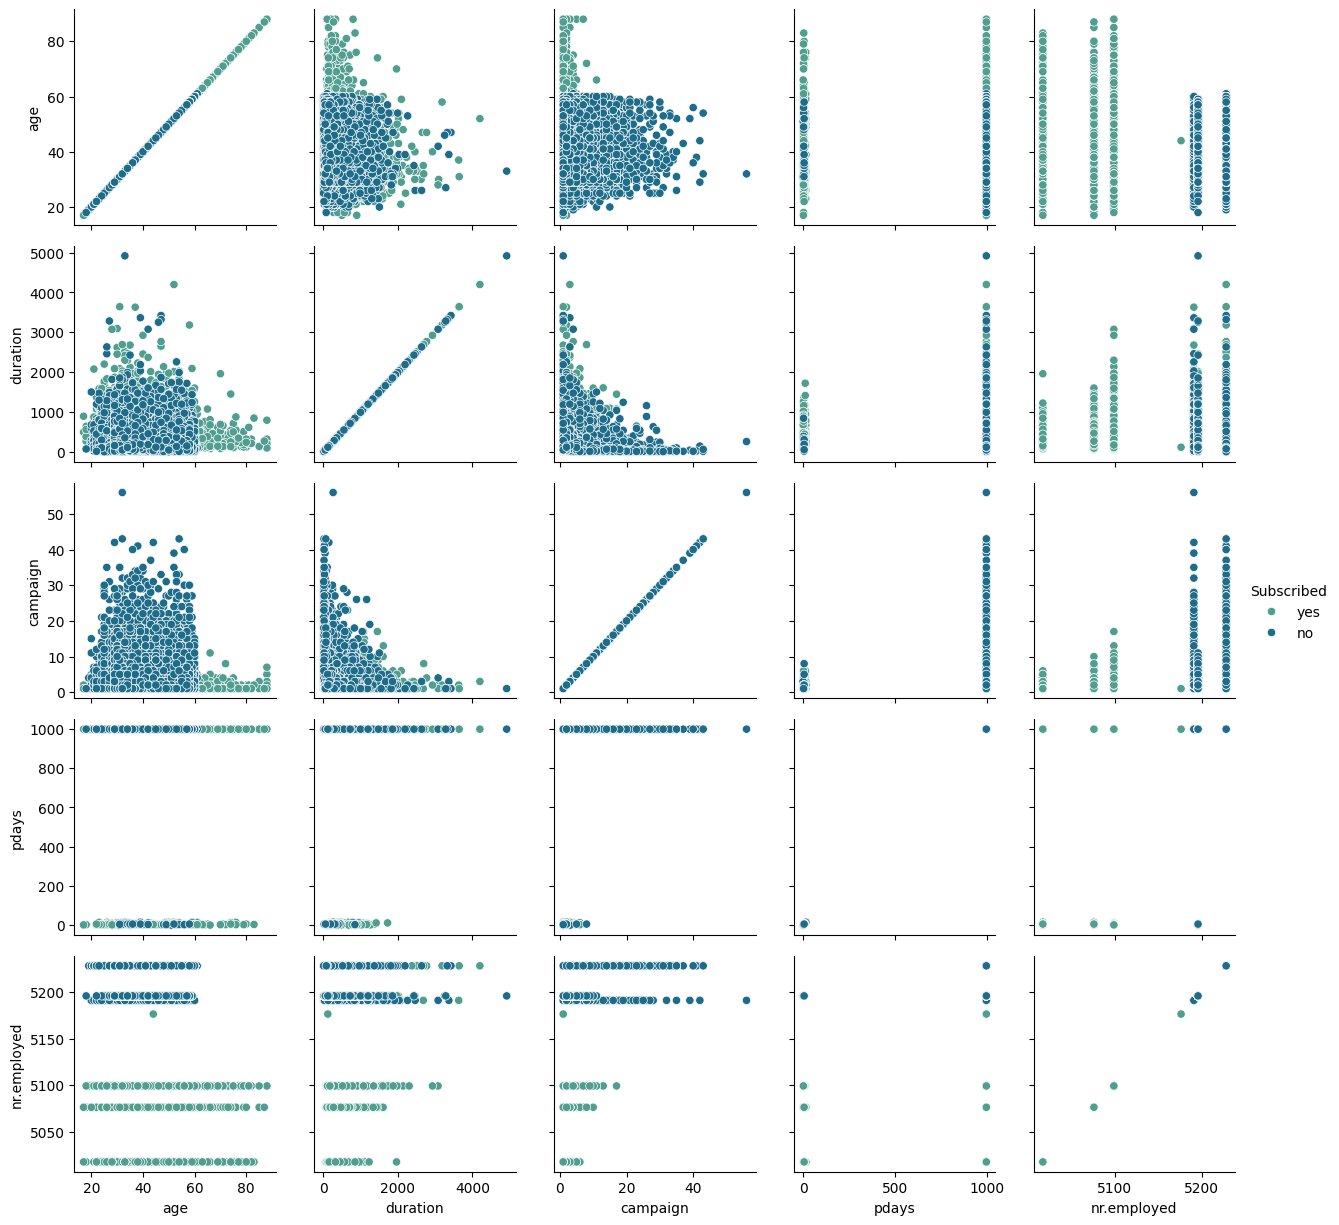

In [24]:
grid = sns.PairGrid(raw_data,hue='Subscribed',palette='crest')
grid.map(sns.scatterplot)
grid.add_legend()

In [4]:
ratio =  (raw_data['Subscribed'].value_counts()['no']/raw_data['Subscribed'].value_counts().sum())*100
ratio

89.08134330907724

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'duration'}>],
       [<Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'pdays'}>],
       [<Axes: title={'center': 'nr.employed'}>, <Axes: >]], dtype=object)

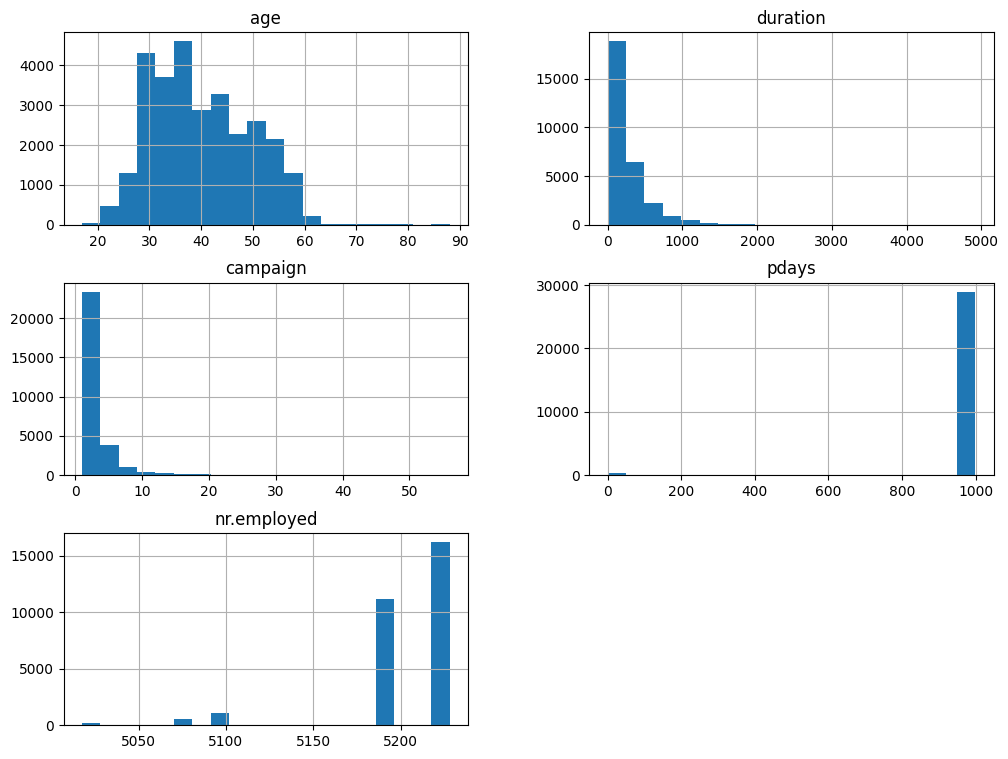

In [5]:
raw_data.hist(bins=20,figsize=(12,9))

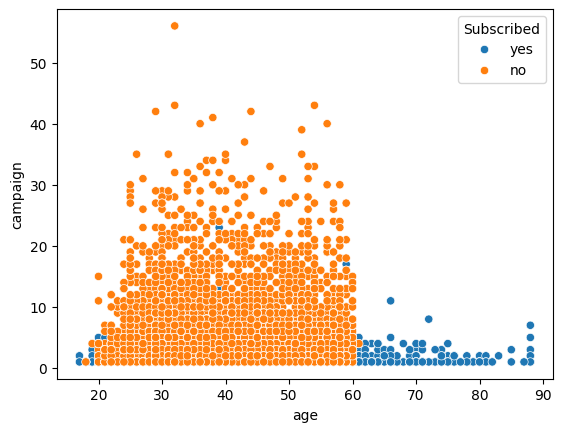

In [25]:
sns.scatterplot(data = raw_data,x='age',y='campaign',hue='Subscribed')
plt.show()

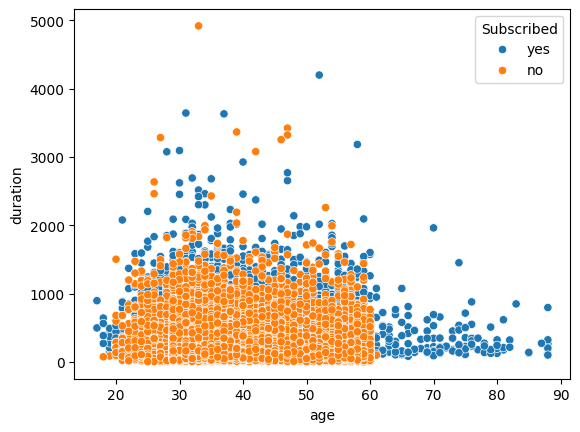

In [26]:
sns.scatterplot(data = raw_data,x='age',y='duration',hue='Subscribed')
plt.show()

In [30]:
#Observe the pattern of the age above 60 years old
raw_data[raw_data['age']>60].sort_values('Subscribed')

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,poutcome,nr.employed,Subscribed
11557,61,retired,married,high.school,unknown,unknown,telephone,jun,wed,99,4,999,nonexistent,5228.1,no
2941,71,retired,married,basic.4y,unknown,unknown,cellular,aug,tue,216,1,999,nonexistent,5076.2,yes
2947,64,retired,married,high.school,no,no,cellular,aug,tue,301,1,999,failure,5076.2,yes
2949,74,retired,divorced,basic.4y,yes,no,cellular,aug,wed,536,1,13,success,5076.2,yes
2956,74,retired,married,university.degree,yes,yes,cellular,aug,wed,232,3,999,nonexistent,5076.2,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1847,69,retired,married,university.degree,yes,no,cellular,apr,thu,616,1,999,nonexistent,5099.1,yes
1884,66,unemployed,single,basic.4y,yes,no,cellular,apr,thu,416,1,999,nonexistent,5099.1,yes
1894,61,retired,divorced,university.degree,no,no,cellular,apr,thu,949,2,999,nonexistent,5099.1,yes
1923,65,management,married,university.degree,no,no,telephone,may,mon,1076,3,6,success,5099.1,yes
